## 1. Module Importieren

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## 2. Datei Lesen

In [2]:
pd.options.display.max_columns = 999 
df = pd.read_csv("Fragebogen Kunden Studie zur Digitalisierung der Gastronomie durch die Coronapandemie.csv")
df = df.drop(columns=["Timestamp"])

df.head()

,Was ist Ihr Geschlecht?,Bitte geben Sie Ihr Alter an,Welchen Abschluss besitzen Sie?,Wie viele Kinder haben Sie?,Was ist Ihr Beschäftigungsstatus?,Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?,Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?,Wie oft pro Monat nutzen Sie einen Lieferdienst?,Nutzten Sie vor Beginn der Coronakrise Lieferdienste?,"Nutzen Sie Lieferdienste seit Beginn der Coronapandemie öfter, seltener oder gleich oft wie zuvor?",Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?,Auf welche Art bestellen Sie?,Seit Beginn der Coronakrise nutze Ich das Internet häufiger um mir Essen zu bestellen.,"Zu welcher bestimmten Essenszeiten benutzen Sie Lieferdienste am häufigsten, um Ihr Essen zu bestellen?",Hat sich Ihr Zahlungsverhalten im Zuge der Krise und der Umstellungen verändert?,Wie oft pro Monat nutzen Sie Takeaways?,Nutzten Sie vor Beginn der Coronakrise Takeaways?,"Nutzen Sie seit Beginn der Coronakrise häufiger, seltener oder gleich oft Takeaways?",Können Sie sich vorstellen ein Konzept wie Kochboxen zu nutzen?,Sind Sie nach der Lockerung der Coronamaßnahmen im späten Frühling bzw. Sommer wieder häufiger ins Restaurant gegangen anstatt Essen zu bestellen?,Können Sie sich vorstellen nach der Coronapandemie wieder öfter in Restaurants essen zu gehen?,"Denken Sie, dass die Nutzung der Lieferdienste während der Coronapandemie einen dauerhaften Effekt auf das Konsumverhalten im Bereich Gastronomie haben wird?","Ich nutze Takeaways, weil kein Lieferdienst verfügbar ist.","Ich nutze Kochboxen, weil ich wegen der Coronapandemie Einkäufe im Supermarkt vermeiden möchte.","Ich nutze Online-Lieferdienste, weil es bequem ist.","Ich nutze Online-Lieferdienste, weil es zeitsparend ist.","Ich nutze Online-Lieferdienste, weil es eine große Essenauswahl gibt.","Ich nutze Online-Lieferdienste, weil das Essen nicht vor Ort bestellbar ist.","Ich nutze Online-Lieferdienste, weil es Rabatte/Angebote gibt.",Ich ziehe Bestellungen oder Takeaways einem Besuch im Restaurant vor.,Ich finde das Homeoffice hat meine Essgewohnheiten verändert.,"Seit ich im Homeoffice bin, bestelle ich mir häufiger etwas zu essen."
0,Männlich,24,Hauptschulabschluss,0,Schüler/Student,200,Ich arbeite im Homeoffice,2 mal pro Monat,Ja,Seltener,Beides,Telefon;Apps;Ich bestelle lieber vor Ort,Ja,Abendessen,Ich bin auf bargeldlose Bezahlung umgestiegen,3 mal pro Monat,Ja,Seltener,4,Ich bin wieder häufiger ins Restaurant gegange...,Ja,"Ja, Essen liefern lassen wird weiterhin belieb...",5,5,4,5,4,5,3,4,4,3
1,Weiblich,25,Bachelor,0,Schüler/Student,150,Ich arbeite im Homeoffice,30,Ja,Unverändert,Vorwiegend größere Online-Lieferdienste,Website,Ja,Abendessen,Ich bin auf bargeldlose Bezahlung umgestiegen,2-3,Ja,Gleich oft,2,Ich bin wieder häufiger ins Restaurant gegange...,Ja,"Ja, Essen liefern lassen wird weiterhin belieb...",3,1,5,5,5,1,3,2,4,3
2,Weiblich,28,Master,0,Vollzeit angestellt,250,Ich arbeite vor Ort,2,Ja,Unverändert,Vorwiegend größere Online-Lieferdienste,Website,Nein,Abendessen,Ich bin auf bargeldlose Bezahlung umgestiegen,8,Ja,Öfter,3,Ja,Ja,"Ja, Essen liefern lassen wird weiterhin belieb...",5,1,5,5,1,1,1,3,1,1
3,Weiblich,24,Bachelor,0,Schüler/Student,150,Ich arbeite vor Ort,2 - 3 mal,Ja,Unverändert,Vorwiegend größere Online-Lieferdienste,Website;Apps,Nein,Mittagessen,Ich nutze beide Methoden,2-3 mal,Nein,Gleich oft,5,Ja,Ja,"Ja, Essen liefern lassen wird weiterhin belieb...",1,1,4,5,3,1,5,1,1,1
4,Weiblich,24,Master,0,Schüler/Student,€100 - €150,Ich arbeite im Homeoffice,1,Nein,Öfter,Vorwiegend größere Online-Lieferdienste,Website,Ja,Abendessen,Ich bin auf bargeldlose Bezahlung umgestiegen,1,Nein,Öfter,3,Ja,Ja,"Ja, Essen liefern lassen wird weiterhin belieb...",1,1,3,3,4,4,1,2,1,1


## 3. Preprocessing

### Drop unused Variables

In [3]:
raw_data = df.drop(["Nutzten Sie vor Beginn der Coronakrise Lieferdienste?",
              "Nutzen Sie Lieferdienste seit Beginn der Coronapandemie öfter, seltener oder gleich oft wie zuvor?",
             "Nutzten Sie vor Beginn der Coronakrise Takeaways?",
             "Nutzen Sie seit Beginn der Coronakrise häufiger, seltener oder gleich oft Takeaways?",
             "Können Sie sich vorstellen nach der Coronapandemie wieder öfter in Restaurants essen zu gehen?",
             "Denken Sie, dass die Nutzung der Lieferdienste während der Coronapandemie einen dauerhaften Effekt auf das Konsumverhalten im Bereich Gastronomie haben wird? ",
             "Ich nutze Takeaways, weil kein Lieferdienst verfügbar ist.",
             "Ich nutze Kochboxen, weil ich wegen der Coronapandemie Einkäufe im Supermarkt vermeiden möchte."], axis=1)

### Rename the Columns

In [4]:
columns_name = ['Geschlecht', 'Alter',
       'Abschluss', 'Anzahl der Kinder',
       'Beschäftigungsstatus',
       'Monatliche Ausgabe f. Lebensmittel',
       'Homeoffice f. Arbeit/Studium',
       'Monatliche Nutzung v. Lieferdienst',
       'Einzelner Restaurants vs große Online-Plattformen',
       'Art für Bestellung',
       'Seit Coronakrise Essen per Internet häufiger bestellen',
       'Essenszeiten',
       'Veränderung v. Zahlungsverhalten',
       'Monatliche Nutzung v. Takeaways',
       'Nutzung v. Kochboxen',
       'Nach der Lockerung wieder ins Restaurant',
       'Grund Online-Lieferdienste: bequem',
       'Grund Online-Lieferdienste: zeitsparend',
       'Grund Online-Lieferdienste: große Essenauswahl',
       'Grund Online-Lieferdienste: Essen nicht vor Ort bestellbar',
       'Grund Online-Lieferdienste: Rabatte/Angebote',
       'Lieber Bestellungen/Takeaways als Restaurantbesuch',
       'Veränderung v. Essgewohnheiten durch Homeoffice',
       'Seit Homeoffice mehr Essen bestellen']

In [5]:
raw_data.columns = columns_name

### Reorder the Columns

In [6]:
columns_name_reordered = ['Geschlecht', 'Abschluss', 'Anzahl der Kinder',
       'Beschäftigungsstatus',
       'Homeoffice f. Arbeit/Studium',
       'Einzelner Restaurants vs große Online-Plattformen',
       'Art für Bestellung',
       'Seit Coronakrise Essen per Internet häufiger bestellen',
       'Essenszeiten', 'Veränderung v. Zahlungsverhalten', 'Nach der Lockerung wieder ins Restaurant', 
       'Monatliche Nutzung v. Takeaways', 'Nutzung v. Kochboxen',
       'Alter', 'Monatliche Ausgabe f. Lebensmittel',
       'Grund Online-Lieferdienste: bequem',
       'Grund Online-Lieferdienste: zeitsparend',
       'Grund Online-Lieferdienste: große Essenauswahl',
       'Grund Online-Lieferdienste: Essen nicht vor Ort bestellbar',
       'Grund Online-Lieferdienste: Rabatte/Angebote',
       'Lieber Bestellungen/Takeaways als Restaurantbesuch',
       'Veränderung v. Essgewohnheiten durch Homeoffice',
       'Seit Homeoffice mehr Essen bestellen', 'Monatliche Nutzung v. Lieferdienst']

In [7]:
raw_data = raw_data[columns_name_reordered]

### Dealing with missing values

In [8]:
raw_data.isnull().sum()

Geschlecht                                                    2
Abschluss                                                     0
Anzahl der Kinder                                             0
Beschäftigungsstatus                                          0
Homeoffice f. Arbeit/Studium                                  0
Einzelner Restaurants vs große Online-Plattformen             0
Art für Bestellung                                            0
Seit Coronakrise Essen per Internet häufiger bestellen        0
Essenszeiten                                                  0
Veränderung v. Zahlungsverhalten                              0
Nach der Lockerung wieder ins Restaurant                      0
Monatliche Nutzung v. Takeaways                               0
Nutzung v. Kochboxen                                          0
Alter                                                         0
Monatliche Ausgabe f. Lebensmittel                            1
Grund Online-Lieferdienste: bequem      

In [9]:
raw_data = raw_data.dropna(axis= 0, how="any")

### Change str to numeric

In [10]:
raw_data["Monatliche Nutzung v. Lieferdienst"].replace({"2 mal pro Monat ": "2",
                                                                      "2 - 3 mal": "3",
                                                                     "2-3": "3",
                                                                     "1-2": "2",
                                                                     "kaum ": "1",
                                                                     "Mind. 1x": "1",
                                                                     "Ca. 2-3 mal": "3",
                                                                     "2-3 ": "3",
                                                                     "10x": "10",
                                                                     "3 mal": "3",
                                                                     "Dreimal pro Monat": "3",
                                                                     "3-4 ": "4",
                                                                     "Nul": "0",
                                                                     "Selten": "2",
                                                                     "1-2 mal" : "2",
                                                                     "3-7": "5",
                                                                     "Ca. 4-6×": "5",
                                                                     "1-3 mal pro woche": "8",
                                                                     "1-3 Mal": "2",
                                                                     "Sehr oft": "8",
                                                                     "Kaum": "1",
                                                                     "3 Mal": "3",
                                                                     "2-3 mal": "3",
                                                                      "2-3 Mal": "3",
                                                                      "2-10" : "6",
                                                                     "0-2": "1",
                                                                      "Nie (0 mal)": "0",
                                                                      "nicht so oft" : "2",
                                                                      "0 -1 Mal" : "0.5",
                                                                      "Maximal ein Mal pro Monat" : "0.5",
                                                                     "6-8": "7",
                                                                      "0-1 mal" : "0.5",
                                                                     "0,5 (einmal in zwei Monaten)": "0.5",
                                                                      "0,5" : "0.5",
                                                                      "höchstens einmal" : "0.5",
                                                                     }, inplace=True)
raw_data["Monatliche Nutzung v. Lieferdienst"] = raw_data["Monatliche Nutzung v. Lieferdienst"].astype("float")

In [11]:
raw_data["Monatliche Nutzung v. Takeaways"].replace({"2 mal pro Monat ": "2",
                                                                      "2 - 3 mal": "3",
                                                                     "2-3": "3",
                                                                     "1-2": "2",
                                                                     "kaum ": "2",
                                                                     "Mind. 1x": "1",
                                                                     "Ca. 2-3 mal": "3",
                                                                     "2-3 ": "3",
                                                                     "10x": "10",
                                                                     "3 mal": "3",
                                                                     "Dreimal pro Monat": "3",
                                                                     "3-4 ": "4",
                                                                     "Nul": "0",
                                                                     "Selten": "3",
                                                                     "1-2 mal" : "2",
                                                                     "3-7": "5",
                                                                     "Ca. 4-6×": "5",
                                                                     "1-3 mal pro woche": "8",
                                                                     "1-3 Mal": "2",
                                                                     "Sehr oft": "9",
                                                                     "Kaum": "2",
                                                                     "3 Mal": "3",
                                                                     "2-3 mal": "3",
                                                                     "0-2": "1",
                                                                     "6-8": "7",
                                                                     "0,5 (einmal in zwei Monaten)": "0.5",
                                                             "3 mal pro Monat": "3",
                                                             "4-5x": "5",
                                                             "4 mal": "4",
                                                             "0-1 mal": "0.5",
                                                             "4-5": "5",
                                                             "1x": "1",
                                                             "5x ": "5",
                                                             "Seit Dem Lockdown 4 Mal im Monat": "4",
                                                             "mehr als 5 Mal": "6",
                                                             "6 mal": "6",
                                                             "2~3": "3",
                                                             "4-5×": "5",
                                                             "8-10": "9",
                                                             "1-3 Mal ": "2",
                                                             "3-4": "4",
                                                             "0-1": "0.5",
                                                             "2-4": "3",
                                                             "7-8 mal pro monat": "8",
                                                             "Alle 2 oder 3 Monate 1 mal": "0.5",
                                                             "2mal":"2",
                                                             "Fast nie" : "1",
                                                             "1-10" : "5",
                                                             "Vielleicht einmal im Vierteljahr (0,33 Mal pro Monat)" : "0.33",
                                                             "nicht oft" : "3",
                                                             "6 Mal" : "6",
                                                             "Maximal ein Mal pro Monat" : "0.5",
                                                             "höchstens einmal": "0.5"
                                                                     }, inplace=True)
raw_data["Monatliche Nutzung v. Takeaways"] = raw_data["Monatliche Nutzung v. Takeaways"].astype("float")

In [12]:
raw_data["Alter"] = raw_data["Alter"].replace({"35)": "35"}).replace({"Neunzehn": "19"})

raw_data["Alter"] = raw_data["Alter"].astype("int32")

In [13]:
raw_data['Monatliche Ausgabe f. Lebensmittel'] = raw_data['Monatliche Ausgabe f. Lebensmittel'].replace({"€100 - €150": "125",
                                                                                    "80 Euro": "80",
                                                                                    "Ca. 400€": "400",
                                                                                    "700€": "700",
                                                                                    "150 €": "150",
                                                                                    "1000-1500 EUR": "1250",
                                                                                    "400€":"400",
                                                                                    "200-300€" : "250",
                                                                                    "150-200" : "175",
                                                                                    "200-250" : "225",
                                                                                    "150€" : "150",
                                                                                    "500€" : "500",
                                                                                    "100-150€" : "125",
                                                                                    "1500€" : "1500",
                                                                                    "400€" : "400",
                                                                                    "150€" : "150",
                                                                                    "180€" : "180",
                                                                                    "250€": "250",
                                                                                    "100€ pP": "100",
                                                                                    "mehr als 50 €": "70",
                                                                                    "Zwischen null und zwanzig Euro": "10",
                                                                                    "150-200€" : "175",
                                                                                    "€150" : "150"})

raw_data['Monatliche Ausgabe f. Lebensmittel'] = raw_data['Monatliche Ausgabe f. Lebensmittel'].astype("float")

## 4. Exploring Data

### a. Lieferdienst

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


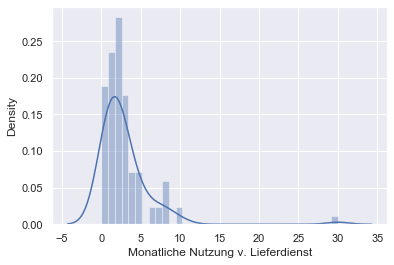

In [14]:
sns.distplot(raw_data["Monatliche Nutzung v. Lieferdienst"])

#### Eliminate outlier

In [15]:
q = raw_data["Monatliche Nutzung v. Lieferdienst"].quantile(0.99)
data_1 = raw_data[raw_data["Monatliche Nutzung v. Lieferdienst"]<q]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


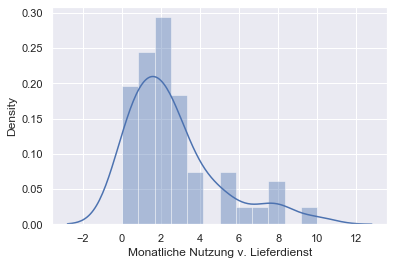

In [16]:
sns.distplot(data_1["Monatliche Nutzung v. Lieferdienst"])

### b. Takeaway

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


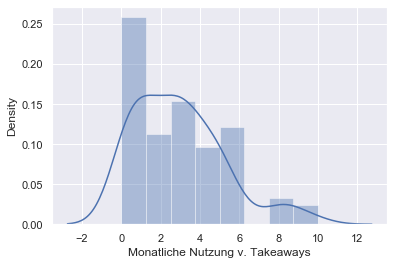

In [17]:
sns.distplot(raw_data["Monatliche Nutzung v. Takeaways"])

### c. Alter


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


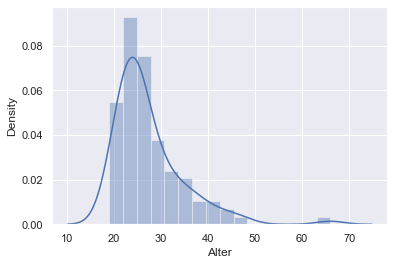

In [18]:
sns.distplot(raw_data["Alter"])

### d. Monatliche Geldausgabe für Lebensmittel

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


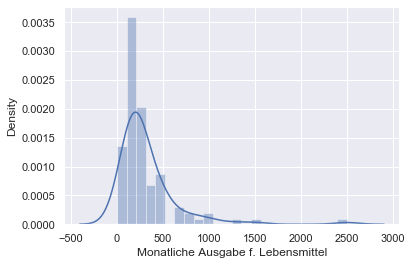

In [19]:
sns.distplot(raw_data['Monatliche Ausgabe f. Lebensmittel'])

#### Eliminate the outliers

In [20]:
q = raw_data['Monatliche Ausgabe f. Lebensmittel'].quantile(0.99)
data_2 = raw_data[raw_data['Monatliche Ausgabe f. Lebensmittel']<q]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


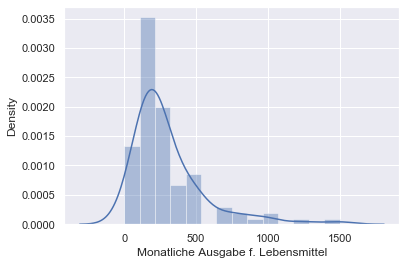

In [21]:
sns.distplot(data_2['Monatliche Ausgabe f. Lebensmittel'])

### e. Create data checkpoint

In [22]:
data_cleaned = data_2.reset_index(drop=True)

## 5. Check the OLS Assumption

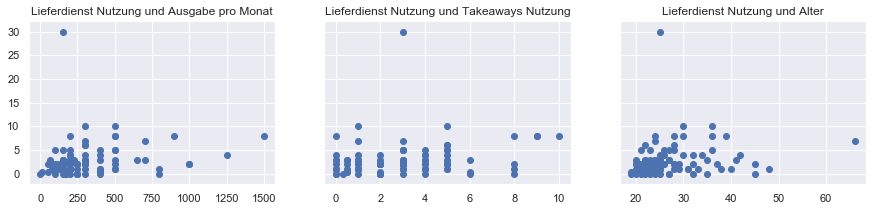

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Monatliche Ausgabe f. Lebensmittel'], data_cleaned["Monatliche Nutzung v. Lieferdienst"])
ax1.set_title("Lieferdienst Nutzung und Ausgabe pro Monat")
ax2.scatter(data_cleaned["Monatliche Nutzung v. Takeaways"], data_cleaned["Monatliche Nutzung v. Lieferdienst"])
ax2.set_title("Lieferdienst Nutzung und Takeaways Nutzung")
ax3.scatter(data_cleaned["Alter"], data_cleaned["Monatliche Nutzung v. Lieferdienst"])
ax3.set_title("Lieferdienst Nutzung und Alter")

plt.show()

##### No need to relaxe the assumption 

### Checking for Multicolinearity

In [24]:
data_cleaned.columns.values

array(['Geschlecht', 'Abschluss', 'Anzahl der Kinder',
       'Beschäftigungsstatus', 'Homeoffice f. Arbeit/Studium',
       'Einzelner Restaurants vs große Online-Plattformen',
       'Art für Bestellung',
       'Seit Coronakrise Essen per Internet häufiger bestellen',
       'Essenszeiten', 'Veränderung v. Zahlungsverhalten',
       'Nach der Lockerung wieder ins Restaurant',
       'Monatliche Nutzung v. Takeaways', 'Nutzung v. Kochboxen', 'Alter',
       'Monatliche Ausgabe f. Lebensmittel',
       'Grund Online-Lieferdienste: bequem',
       'Grund Online-Lieferdienste: zeitsparend',
       'Grund Online-Lieferdienste: große Essenauswahl',
       'Grund Online-Lieferdienste: Essen nicht vor Ort bestellbar',
       'Grund Online-Lieferdienste: Rabatte/Angebote',
       'Lieber Bestellungen/Takeaways als Restaurantbesuch',
       'Veränderung v. Essgewohnheiten durch Homeoffice',
       'Seit Homeoffice mehr Essen bestellen',
       'Monatliche Nutzung v. Lieferdienst'], dtype=obje

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Monatliche Ausgabe f. Lebensmittel",
                          "Monatliche Nutzung v. Takeaways", "Alter"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [26]:
vif

,VIF,features
0,3.297923,Monatliche Ausgabe f. Lebensmittel
1,2.820059,Monatliche Nutzung v. Takeaways
2,4.232452,Alter


1 < VIF < 5 = Die Multikolinearität ist in Ordnung

## 6. Create Dummy Variables

In [27]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [28]:
data_with_dummies.head()

,Monatliche Nutzung v. Takeaways,Nutzung v. Kochboxen,Alter,Monatliche Ausgabe f. Lebensmittel,Grund Online-Lieferdienste: bequem,Grund Online-Lieferdienste: zeitsparend,Grund Online-Lieferdienste: große Essenauswahl,Grund Online-Lieferdienste: Essen nicht vor Ort bestellbar,Grund Online-Lieferdienste: Rabatte/Angebote,Lieber Bestellungen/Takeaways als Restaurantbesuch,Veränderung v. Essgewohnheiten durch Homeoffice,Seit Homeoffice mehr Essen bestellen,Monatliche Nutzung v. Lieferdienst,Geschlecht_Weiblich,Abschluss_Bachelor,Abschluss_Doktor oder höher,Abschluss_Hauptschulabschluss,Abschluss_Master,Abschluss_Mittlere Reife,Abschluss_abgeschlossene Berufsausbildung,Anzahl der Kinder_1,Anzahl der Kinder_2,Anzahl der Kinder_4,Anzahl der Kinder_Keine Angabe,Beschäftigungsstatus_In Rente,Beschäftigungsstatus_Schüler/Student,Beschäftigungsstatus_Selbstständig,Beschäftigungsstatus_Teilzeit angestellt,Beschäftigungsstatus_Vollzeit angestellt,Homeoffice f. Arbeit/Studium_Ich arbeite im Homeoffice,Homeoffice f. Arbeit/Studium_Ich arbeite vor Ort,Einzelner Restaurants vs große Online-Plattformen_Vorwiegend größere Online-Lieferdienste,Einzelner Restaurants vs große Online-Plattformen_Vorwiegend hauseigene Lieferdienste der Restaurants,Art für Bestellung_Apps;Ich bestelle lieber vor Ort,Art für Bestellung_Ich bestelle lieber vor Ort,Art für Bestellung_Telefon,Art für Bestellung_Telefon;Apps,Art für Bestellung_Telefon;Apps;Ich bestelle lieber vor Ort,Art für Bestellung_Telefon;Ich bestelle lieber vor Ort,Art für Bestellung_Telefon;Website,Art für Bestellung_Telefon;Website;Apps,Art für Bestellung_Telefon;Website;Apps;Ich bestelle lieber vor Ort,Art für Bestellung_Telefon;Website;Ich bestelle lieber vor Ort,Art für Bestellung_Website,Art für Bestellung_Website;Apps,Art für Bestellung_Website;Apps;Ich bestelle lieber vor Ort,Art für Bestellung_Website;Ich bestelle lieber vor Ort,Seit Coronakrise Essen per Internet häufiger bestellen_Nein,Essenszeiten_Mittagessen,Veränderung v. Zahlungsverhalten_Ich nutze beide Methoden,Veränderung v. Zahlungsverhalten_Ich nutze weiterhin Bargeld,Nach der Lockerung wieder ins Restaurant_Ja,Nach der Lockerung wieder ins Restaurant_Nein
0,3.0,4,24,200.0,4,5,4,5,3,4,4,3,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,2,25,150.0,5,5,5,1,3,2,4,3,30.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8.0,3,28,250.0,5,5,1,1,1,3,1,1,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,3.0,5,24,150.0,4,5,3,1,5,1,1,1,3.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0
4,1.0,3,24,125.0,3,3,4,4,1,2,1,1,1.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### Reorder the columns

In [29]:
columns = ['Monatliche Nutzung v. Takeaways', 'Nutzung v. Kochboxen', 'Alter',
       'Monatliche Ausgabe f. Lebensmittel',
       'Grund Online-Lieferdienste: bequem',
       'Grund Online-Lieferdienste: zeitsparend',
       'Grund Online-Lieferdienste: große Essenauswahl',
       'Grund Online-Lieferdienste: Essen nicht vor Ort bestellbar',
       'Grund Online-Lieferdienste: Rabatte/Angebote',
       'Lieber Bestellungen/Takeaways als Restaurantbesuch',
       'Veränderung v. Essgewohnheiten durch Homeoffice',
       'Seit Homeoffice mehr Essen bestellen',
       'Geschlecht_Weiblich',
       'Abschluss_Bachelor', 'Abschluss_Doktor oder höher',
       'Abschluss_Hauptschulabschluss', 'Abschluss_Master',
       'Abschluss_Mittlere Reife',
       'Abschluss_abgeschlossene Berufsausbildung', 'Anzahl der Kinder_1',
       'Anzahl der Kinder_2', 'Anzahl der Kinder_4',
       'Anzahl der Kinder_Keine Angabe', 'Beschäftigungsstatus_In Rente',
       'Beschäftigungsstatus_Schüler/Student',
       'Beschäftigungsstatus_Selbstständig',
       'Beschäftigungsstatus_Teilzeit angestellt',
       'Beschäftigungsstatus_Vollzeit angestellt',
       'Homeoffice f. Arbeit/Studium_Ich arbeite im Homeoffice',
       'Homeoffice f. Arbeit/Studium_Ich arbeite vor Ort',
       'Einzelner Restaurants vs große Online-Plattformen_Vorwiegend größere Online-Lieferdienste',
       'Einzelner Restaurants vs große Online-Plattformen_Vorwiegend hauseigene Lieferdienste der Restaurants',
       'Art für Bestellung_Apps;Ich bestelle lieber vor Ort',
       'Art für Bestellung_Ich bestelle lieber vor Ort',
       'Art für Bestellung_Telefon', 'Art für Bestellung_Telefon;Apps',
       'Art für Bestellung_Telefon;Apps;Ich bestelle lieber vor Ort',
       'Art für Bestellung_Telefon;Ich bestelle lieber vor Ort',
       'Art für Bestellung_Telefon;Website',
       'Art für Bestellung_Telefon;Website;Apps',
       'Art für Bestellung_Telefon;Website;Apps;Ich bestelle lieber vor Ort',
       'Art für Bestellung_Telefon;Website;Ich bestelle lieber vor Ort',
       'Art für Bestellung_Website', 'Art für Bestellung_Website;Apps',
       'Art für Bestellung_Website;Apps;Ich bestelle lieber vor Ort',
       'Art für Bestellung_Website;Ich bestelle lieber vor Ort',
       'Seit Coronakrise Essen per Internet häufiger bestellen_Nein',
       'Essenszeiten_Mittagessen',
       'Veränderung v. Zahlungsverhalten_Ich nutze beide Methoden',
       'Veränderung v. Zahlungsverhalten_Ich nutze weiterhin Bargeld',
       'Nach der Lockerung wieder ins Restaurant_Ja',
       'Nach der Lockerung wieder ins Restaurant_Nein', 'Monatliche Nutzung v. Lieferdienst']

In [30]:
data_preprocessed = data_with_dummies[columns]

### Rename the columns

In [31]:
columns_names = ["Monatliche Nutzung v. Takeaways", 'Nutzung v. Kochboxen', 'Alter',
       'Monatliche Ausgabe f. Lebensmittel',
       'Grund Online-Lieferdienste: bequem',
       'Grund Online-Lieferdienste: zeitsparend',
       'Grund Online-Lieferdienste: große Essenauswahl',
       'Grund Online-Lieferdienste: Essen nicht vor Ort bestellbar',
       'Grund Online-Lieferdienste: Rabatte/Angebote',
       'Bestellungen/Takeaways > Restaurantbesuch',
       'Homeoffice verändert Essgewohnheit',
       'Seit Homeoffice mehr Essen bestellen', 'Geschlecht: Weiblich',
       'Abschluss: Bachelor', 'Abschluss: Doktor oder höher',
       'Abschluss: Hauptschulabschluss', 'Abschluss: Master',
       'Abschluss: Mittlere Reife',
       'Abschluss_abgeschlossene Berufsausbildung', 'Kinder: 1',
       'Kinder: 2', 'Kinder: 4',
       'Kinder: Keine Angabe', 'Beschäftigungsstatus: In Rente',
       'Beschäftigungsstatus: Schüler/Student',
       'Beschäftigungsstatus: Selbstständig',
       'Beschäftigungsstatus: Teilzeit angestellt',
       'Beschäftigungsstatus: Vollzeit angestellt',
       '1: Ich arbeite im Homeoffice',
       '2: Ich arbeite vor Ort',
       '1: Vorwiegend größere Online-Lieferdienste',
       '2: Vorwiegend hauseigene Lieferdienste der Restaurants',
       'Art für Bestellung: Apps;Ich bestelle lieber vor Ort',
       'Art für Bestellung: Ich bestelle lieber vor Ort',
       'Art für Bestellung: Telefon', 'Art für Bestellung_Telefon;Apps',
       'Art für Bestellung: Telefon;Apps;Ich bestelle lieber vor Ort',
       'Art für Bestellung: Telefon;Ich bestelle lieber vor Ort',
       'Art für Bestellung: Telefon;Website',
       'Art für Bestellung: Telefon;Website;Apps',
       'Art für Bestellung: Telefon;Website;Apps;Ich bestelle lieber vor Ort',
       'Art für Bestellung: Telefon;Website;Ich bestelle lieber vor Ort',
       'Art für Bestellung: Website', 'Art für Bestellung_Website;Apps',
       'Art für Bestellung: Website;Apps;Ich bestelle lieber vor Ort',
       'Art für Bestellung: Website;Ich bestelle lieber vor Ort',
       'Seit Coronakrise Essen per Internet häufiger bestellen_Nein',
       'Essenszeiten_Mittagessen',
       'Zahlungsverhalten: beide Methoden',
       'Zahlungsverhalten: weiterhin Bargeld',
       'Nach der Lockerung wieder ins Restaurant',
       'Nach der Lockerung nicht wieder ins Restaurant',
       'Monatliche Nutzung v. Lieferdienst']

In [32]:
data_preprocessed.columns = columns_names

## 7. Linear Regression Model

### a) Declare Inputs and Target

#### Target

In [33]:
data_preprocessed["Monatliche Nutzung v. Lieferdienst"].median()

2.0

In [34]:
target = np.where(data_preprocessed["Monatliche Nutzung v. Lieferdienst"] >
                   data_preprocessed["Monatliche Nutzung v. Lieferdienst"].median(), 1, 0)

In [35]:
data_preprocessed["Übermäßige Nutzung des Lieferservices"] = target

data_preprocessed.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Monatliche Nutzung v. Takeaways,Nutzung v. Kochboxen,Alter,Monatliche Ausgabe f. Lebensmittel,Grund Online-Lieferdienste: bequem,Grund Online-Lieferdienste: zeitsparend,Grund Online-Lieferdienste: große Essenauswahl,Grund Online-Lieferdienste: Essen nicht vor Ort bestellbar,Grund Online-Lieferdienste: Rabatte/Angebote,Bestellungen/Takeaways > Restaurantbesuch,Homeoffice verändert Essgewohnheit,Seit Homeoffice mehr Essen bestellen,Geschlecht: Weiblich,Abschluss: Bachelor,Abschluss: Doktor oder höher,Abschluss: Hauptschulabschluss,Abschluss: Master,Abschluss: Mittlere Reife,Abschluss_abgeschlossene Berufsausbildung,Kinder: 1,Kinder: 2,Kinder: 4,Kinder: Keine Angabe,Beschäftigungsstatus: In Rente,Beschäftigungsstatus: Schüler/Student,Beschäftigungsstatus: Selbstständig,Beschäftigungsstatus: Teilzeit angestellt,Beschäftigungsstatus: Vollzeit angestellt,1: Ich arbeite im Homeoffice,2: Ich arbeite vor Ort,1: Vorwiegend größere Online-Lieferdienste,2: Vorwiegend hauseigene Lieferdienste der Restaurants,Art für Bestellung: Apps;Ich bestelle lieber vor Ort,Art für Bestellung: Ich bestelle lieber vor Ort,Art für Bestellung: Telefon,Art für Bestellung_Telefon;Apps,Art für Bestellung: Telefon;Apps;Ich bestelle lieber vor Ort,Art für Bestellung: Telefon;Ich bestelle lieber vor Ort,Art für Bestellung: Telefon;Website,Art für Bestellung: Telefon;Website;Apps,Art für Bestellung: Telefon;Website;Apps;Ich bestelle lieber vor Ort,Art für Bestellung: Telefon;Website;Ich bestelle lieber vor Ort,Art für Bestellung: Website,Art für Bestellung_Website;Apps,Art für Bestellung: Website;Apps;Ich bestelle lieber vor Ort,Art für Bestellung: Website;Ich bestelle lieber vor Ort,Seit Coronakrise Essen per Internet häufiger bestellen_Nein,Essenszeiten_Mittagessen,Zahlungsverhalten: beide Methoden,Zahlungsverhalten: weiterhin Bargeld,Nach der Lockerung wieder ins Restaurant,Nach der Lockerung nicht wieder ins Restaurant,Monatliche Nutzung v. Lieferdienst,Übermäßige Nutzung des Lieferservices
0,3.0,4,24,200.0,4,5,4,5,3,4,4,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
1,3.0,2,25,150.0,5,5,5,1,3,2,4,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30.0,1
2,8.0,3,28,250.0,5,5,1,1,1,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,2.0,0
3,3.0,5,24,150.0,4,5,3,1,5,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,3.0,1
4,1.0,3,24,125.0,3,3,4,4,1,2,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0,0


In [36]:
data_with_targets = data_preprocessed.drop(["Monatliche Nutzung v. Lieferdienst"], axis=1)

data_with_targets is data_preprocessed

False

#### Inputs

In [37]:
unscaled_inputs = data_with_targets.iloc[:,:-1]

In [38]:
columns_to_scale = ['Monatliche Nutzung v. Takeaways', 'Nutzung v. Kochboxen', 'Alter',
       'Monatliche Ausgabe f. Lebensmittel',
       'Grund Online-Lieferdienste: bequem',
       'Grund Online-Lieferdienste: zeitsparend',
       'Grund Online-Lieferdienste: große Essenauswahl',
       'Grund Online-Lieferdienste: Essen nicht vor Ort bestellbar',
       'Grund Online-Lieferdienste: Rabatte/Angebote',
       'Bestellungen/Takeaways > Restaurantbesuch',
       'Homeoffice verändert Essgewohnheit',
       'Seit Homeoffice mehr Essen bestellen']

### b) Scale the data 
##### Standardize the Data without touching the Dummy Variables!!!

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler (BaseEstimator, TransformerMixin):
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns = self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [40]:
lieferdienst_scaler = CustomScaler(columns_to_scale)

In [41]:
lieferdienst_scaler.fit(unscaled_inputs)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Monatliche Nutzung v. Takeaways', 'Nutzung v. Kochboxen',
                      'Alter', 'Monatliche Ausgabe f. Lebensmittel',
                      'Grund Online-Lieferdienste: bequem',
                      'Grund Online-Lieferdienste: zeitsparend',
                      'Grund Online-Lieferdienste: große Essenauswahl',
                      'Grund Online-Lieferdienste: Essen nicht vor Ort '
                      'bestellbar',
                      'Grund Online-Lieferdienste: Rabatte/Angebote',
                      'Bestellungen/Takeaways > Restaurantbesuch',
                      'Homeoffice verändert Essgewohnheit',
                      'Seit Homeoffice mehr Essen bestellen'],
             copy=None, with_mean=None, with_std=None)

In [42]:
scaled_inputs = lieferdienst_scaler.transform(unscaled_inputs)

### c) Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, test_size=0.2, random_state=123)

### d) Create Regression

In [44]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### e) Create Prediction


In [45]:
y_hat = reg.predict(x_train)

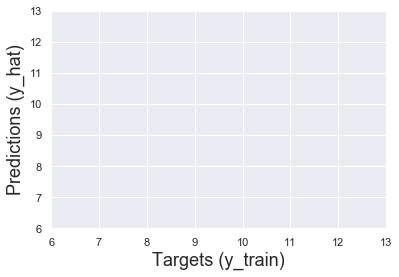

In [46]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### f) Residual (Difference y_train - y_dach)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

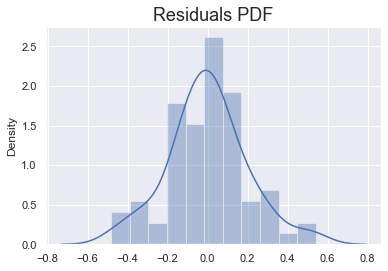

In [47]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

- If y_train - y_hat is much lower than the mean (there are many negative values), a much higher price is predicted than is observed (Over-Estimated the Target)

- If y_train - y_hat is much higher than the mean (there are many positive values), a much lower price is predicted than is observed (Under-Estimated the Target)

### g) R^2

In [48]:
reg.score(x_train, y_train)

0.8419954687284678

## 8. Finding Weights & Bias

In [49]:
reg.intercept_

-0.4909177131158372

In [50]:
reg.coef_

array([ 1.21149524e-02,  5.83096666e-02,  1.27237043e-01,  2.04542457e-01,
        1.77629855e-02,  1.20077370e-01,  1.14406490e-02,  1.50571508e-01,
        1.02954288e-03, -2.82468162e-01,  2.80874428e-02,  3.28981472e-01,
        6.87973141e-02,  1.87994112e-01,  1.73543169e-01,  1.95828994e-01,
        2.96008790e-02,  1.07047169e+00,  1.57154824e+00,  1.52923665e-01,
       -6.28455101e-01, -1.34964850e+00,  1.84257682e+00,  2.27796917e-01,
        4.63670134e-01,  6.27983673e-01,  3.43609387e-02,  4.84664157e-01,
        7.59148994e-02,  3.72073732e-01,  2.47150042e-01,  3.83216453e-01,
        4.99600361e-16, -6.10622664e-16,  1.86963090e-01, -4.39171610e-02,
       -3.65918791e-01, -4.16333634e-17,  1.61348472e-01,  4.18778340e-01,
       -1.10085345e+00, -5.55994916e-01,  1.57309834e-01,  1.68490150e-01,
        1.81098096e-01, -5.66936974e-01, -1.92064726e-01, -1.74300960e-01,
        2.43202047e-01,  1.18999980e-01, -9.42365608e-02,  6.97715622e-02])

In [51]:
reg_summary = pd.DataFrame(scaled_inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_

reg_summary.sort_values("Weights", ascending= False)

,Features,Weights
22,Kinder: Keine Angabe,1.842577e+00
18,Abschluss_abgeschlossene Berufsausbildung,1.571548e+00
17,Abschluss: Mittlere Reife,1.070472e+00
25,Beschäftigungsstatus: Selbstständig,6.279837e-01
27,Beschäftigungsstatus: Vollzeit angestellt,4.846642e-01
24,Beschäftigungsstatus: Schüler/Student,4.636701e-01
39,Art für Bestellung: Telefon;Website;Apps,4.187783e-01
31,2: Vorwiegend hauseigene Lieferdienste der Res...,3.832165e-01
29,2: Ich arbeite vor Ort,3.720737e-01
11,Seit Homeoffice mehr Essen bestellen,3.289815e-01


### Make Odds Ratio

In [52]:
reg_summary["Odds Ratio"] = np.exp(reg_summary.Weights)

reg_summary.sort_values("Odds Ratio", ascending = False)

,Features,Weights,Odds Ratio
22,Kinder: Keine Angabe,1.842577e+00,6.312784
18,Abschluss_abgeschlossene Berufsausbildung,1.571548e+00,4.814096
17,Abschluss: Mittlere Reife,1.070472e+00,2.916755
25,Beschäftigungsstatus: Selbstständig,6.279837e-01,1.873829
27,Beschäftigungsstatus: Vollzeit angestellt,4.846642e-01,1.623630
24,Beschäftigungsstatus: Schüler/Student,4.636701e-01,1.589898
39,Art für Bestellung: Telefon;Website;Apps,4.187783e-01,1.520103
31,2: Vorwiegend hauseigene Lieferdienste der Res...,3.832165e-01,1.466996
29,2: Ich arbeite vor Ort,3.720737e-01,1.450740
11,Seit Homeoffice mehr Essen bestellen,3.289815e-01,1.389552


##### A Feature is NOT particularly IMPORTANT if:
- Its coefficient is around 0
- Its odds ratio is around 1 (For a uni change in the standardized feature, the odds increase by a multilpe equal to the odds ratio (1= no change))

Beispiel: Beshcäftigungsstatus: Student/Schüler : For a unit change, it is 19 times MORE LIKELY that a person will use online food delivery service per month.